#Introduction to NLP fundamentals in TensorFlow

NLP has the goal of deriving information out of natural language (could be sequenced text or speech)

Another common term for NLP problems is sequence to sequence problems (seq2seq)


##check for GPU

In [1]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 58.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0
  Attempting uninstall: google-auth-oauthlib
    Fo

In [2]:
!nvidia-smi -L

/bin/bash: nvidia-smi: command not found


##Get helper functions

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

#get helper functions for our notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-05-03 13:14:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-03 13:14:30 (89.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

The dataset we're going to use is Kaggle's introduction to NLP dataset (text samples of Tweets labelled as disaster or not disaster)

See the original source on Kaggle

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-05-03 13:14:34--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  1.49MB/s    in 0.4s    

2023-05-03 13:14:35 (1.49 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
#unzip data
unzip_data("nlp_getting_started.zip")

##Visualizing a text dataset

to visualize our text samples, we first have to read them in, one way to do so would be to use Python

But I prefer to get visual straight away

So another way to do this is to use Pandas

if the dataset is too large, then you might want to use load_text from tensorflow

In [6]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [8]:
#shuffle training dataframe
train_df_shuffled =train_df.sample(frac=1, random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
#what does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
#how many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
#how many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [12]:
#Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) #create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index + 5].itertuples():
  _, text, target = row
  print(f"target: {target}", "(real_disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n {text}\n")
  print("-----\n")

target: 1 (real_disaster)
Text:
 Pakistan Supreme Court endorses military courts for terrorism cases http://t.co/sZeapuEuvy

-----

target: 0 (not real disaster)
Text:
 @DevinJoslyn thunder and lighting ????

-----

target: 1 (real_disaster)
Text:
 If you did a cannon ball into the ocean then Japan would evacuate.

-----

target: 1 (real_disaster)
Text:
 @Ashayo @MsMiggi Hi Ashayo! I believe there will be VODs on YouTube after the presentation but there is nothing like seeing it live :)

-----

target: 1 (real_disaster)
Text:
 A poignant reminder that in war there are many casualties. http://t.co/Mwmt3BdR5L

-----



### Split data in training and validation data sets

In [13]:
from sklearn.model_selection import train_test_split



In [14]:
from traitlets import Sentinel
#use train test split to split training data into training and valiation sets

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size = 0.1, #use 10% of training data for valiation split
                                                                            random_state = 42)

In [15]:
#check the len of our dataset
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [16]:
#check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

### Converting text into numbers
When dealing with text problem, one of the first thing you have to do before you can build a model, is to convert your text to numbers.

There are several ways to do this, namely:
* Tokenization - direct mapping of token ( a token could be a word or a character) to number
* Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)

### Text vectorization (tokenization)

In [17]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization


#Use the default TextVetorization parameters
text_vectorizer = TextVectorization(max_tokens = 10000, #how many words in our vocabulary (automatically add <OOV> (out of vocabulary))
                                    standardize = "lower_and_strip_punctuation",
                                    split = "whitespace",
                                    ngrams = None, #create groups of n-words?
                                    output_mode = "int",#how to map tokens to number
                                    output_sequence_length = None, #how long do you want your sequences to be
                                    pad_to_max_tokens = True)


In [19]:
len(train_sentences[0].split())

7

In [20]:
#find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [21]:
#setup text vectorization variables
max_vocab_length = 10000 #max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many owrds from a tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens= max_vocab_length,
                                       output_mode = "int",
                                       output_sequence_length = max_length)

In [22]:
#fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [23]:
#create a sample sentence and tokenize it 
sample_sentence = "there's a flood in my street!"

text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [24]:
#Choose a random sentence from the training  dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        n\n\nVectorized version:")

text_vectorizer([random_sentence])

Original text:
 #NowPlaying: Rene Ablaze &amp; Ian Buff - Magnitude http://t.co/Av2JSjfFtc  #EDM        n

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 619, 9194,  715,   35, 3756,    1,    1,    1, 1685,    0,    0,
           0,    0,    0,    0]])>

In [25]:
#get the unique words in to vocabulary 
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words = words_in_vocab[-5:] #get the least common words
print(f"number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an Embedding layer

To make our embedding, we're going to use TensorFlow's embedding layer:

The parameters we care most about for our embedding layer:
* `input_dim` - the size of our vocabulary
* `output_dim` - the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
*`input_length` - length of the sequences being passed to the embedding layer


In [26]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,#set input shape
                             output_dim = 128, #output shape
                             embeddings_initializer = "uniform",
                             input_length = max_length, #how long is each input
                             )

embedding

In [27]:
#get random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
n\n\nEmbedded version:")

#Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 Read this already in '14 but it was and remains one of my favorite articles ever. ?'LetÛªs Like Demolish Laundry'? http://t.co/6suPThAecen

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.03845122, -0.00355594,  0.00572335, ...,  0.03170886,
         -0.03150104, -0.04544305],
        [-0.00168312,  0.01049798,  0.0039989 , ...,  0.02996281,
          0.03589297,  0.020037  ],
        [-0.03019117,  0.02163638,  0.0336324 , ...,  0.04122882,
          0.0331236 ,  0.04464301],
        ...,
        [ 0.01031431,  0.01963884, -0.02298168, ...,  0.02059278,
          0.0474578 ,  0.02610344],
        [-0.01111786,  0.04264536,  0.00262464, ...,  0.04749422,
         -0.0012529 , -0.0335984 ],
        [ 0.02981189, -0.03757966,  0.04628992, ..., -0.03541394,
          0.01678521,  0.00484395]]], dtype=float32)>

In [28]:
#checkout a  single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.03845122, -0.00355594,  0.00572335,  0.04781613, -0.0119669 ,
         0.04361041,  0.02649801,  0.00286782, -0.04671376, -0.03889444,
        -0.02328366,  0.01539352, -0.03208818,  0.04667247, -0.01457121,
         0.00547035, -0.00700669, -0.02681923,  0.03086759,  0.00227248,
        -0.04551278,  0.00763507, -0.02979583,  0.01893545,  0.04791132,
         0.01565591, -0.03086693, -0.04403352, -0.03667455, -0.00190981,
         0.04775231,  0.00321341, -0.002163  ,  0.02195938, -0.00900586,
        -0.00049802, -0.00644641,  0.04398277,  0.0052228 , -0.04490038,
        -0.04338304, -0.048602  ,  0.03825244,  0.04883078,  0.04705664,
        -0.01500915, -0.01922139, -0.02741241, -0.04670012,  0.01947763,
         0.02204497, -0.04784107, -0.01484529, -0.02433218, -0.01400982,
        -0.00077996,  0.01621225, -0.04261761, -0.01231502,  0.02296868,
         0.04970378,  0.00489705,  0.04736261,  0.00133768,  0.03247828,
  

## Modelling a text dataset (running a serie of experiments)

Now we've got a way to turn our text sequences into numbers, it's time to start bulding a series of modelling experiments.

we'll start with a baseline and move on from there.

* Model 0: Naive Bayes (baseline), this is from sklearn ML map
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: Tensorflow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data

How are we going to approach all of these?

Use the standard steps in modelling with tensorflow:

* Create a model
* Build a model
* Fit a model
* Evaluate our model

### Model 0: Getting a baseline

as with all machine learning modelling experiments, it's important to create a baseline model so you got a benchmark for future experiments to build upon

To create our baseline we'll Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our words to number

> **note:** it's common pratice to use non-DL algorithms as a baseline because of their speed and then later using DL to see if you can improve upon them


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), #convert words to numbers using tfidf
    ("clf", MultinomialNB()) #model the text
])

#fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [30]:
#Evaluate our baseline model

baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f} ")

Our baseline model achieves an accuracy of: 79.27 


In [31]:
#make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

from pandas.core.arrays.timedeltas import precision_from_unit
### Creating an evaluation function for our model experiments

We could evaluate all of our model's predictions with different metrics every time, however, this will be cumbersome and could easily be fixed with a function

Let's create one to compare our model predictions with the truth labels using the following metrics

* accuracy
* precision
* recall
* f1-score

for a deep overview of many different evaluation methods, see the Sklearn documentation:

In [32]:
# Function to evaluate: accuracy, precision, recall, f1-score

from sklearn.metrics import  accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculate model accuracy, precision, recall and f1 score of a binary classification model

  
  """

  #calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100

  #calculate model precision, recall and f1-score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average = "weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}

  return model_results

In [33]:
#get baseline results
baseline_results = calculate_results(y_true = val_labels,
                                     y_pred = baseline_preds)

baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: A simple dense model




In [34]:
# Create a tensorboard callback (need to create a new one for each model)

from helper_functions import create_tensorboard_callback

#Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [35]:
#Build model with the Functional API

from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = tf.string) # inputs are 1 dimensional strings
x = text_vectorizer(inputs) # turn input text into numbers (tokenization)
x = embedding(x) #Create an embedding of the numerized  inputs
x=layers.GlobalAveragePooling1D()(x) #condense the feature vector for each token to one vector
outputs = layers.Dense(1, activation = "sigmoid")(x) # Create the output layer, want binary output => sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name = "model_1_dense")



In [36]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [37]:
#compile model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])



In [38]:
#fit the model
model_1_history = model_1.fit(x=train_sentences, 
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20230503-131437
Epoch 1/5
215/215 [==============================] - 6s 22ms/step - loss: 0.6100 - accuracy: 0.6951 - val_loss: 0.5359 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 6s 26ms/step - loss: 0.4395 - accuracy: 0.8203 - val_loss: 0.4708 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 8s 39ms/step - loss: 0.3452 - accuracy: 0.8606 - val_loss: 0.4638 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 7s 34ms/step - loss: 0.2832 - accuracy: 0.8934 - val_loss: 0.4658 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 7s 33ms/step - loss: 0.2359 - accuracy: 0.9121 - val_loss: 0.4797 - val_accuracy: 0.7808


In [39]:
#Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7808


[0.47969070076942444, 0.7808399200439453]

In [40]:
model_1_pred_probs =model_1.predict(val_sentences)
model_1_pred_probs.shape

(762, 1)

In [41]:
#look at a single prediction
model_1_pred_probs[0]

array([0.3415065], dtype=float32)

In [42]:
model_1_pred_probs[10:]

array([[1.23144627e-01],
       [7.03728974e-01],
       [5.30102253e-02],
       [1.86033785e-01],
       [4.23794985e-03],
       [1.32093847e-01],
       [3.01121771e-02],
       [8.72390866e-02],
       [2.25585431e-01],
       [5.59158504e-01],
       [9.08471227e-01],
       [4.58199084e-02],
       [4.15126055e-01],
       [9.30040181e-02],
       [9.58226562e-01],
       [9.98853922e-01],
       [3.73672247e-02],
       [6.37789369e-02],
       [2.96528935e-02],
       [1.73921049e-01],
       [6.07601702e-01],
       [2.65092224e-01],
       [5.24767458e-01],
       [1.59116834e-01],
       [5.10441363e-01],
       [5.91914654e-02],
       [9.94992197e-01],
       [1.80335045e-01],
       [4.14166451e-02],
       [9.98319745e-01],
       [2.25599200e-01],
       [2.03467309e-02],
       [3.26802373e-01],
       [5.68358600e-02],
       [7.10325360e-01],
       [9.84428108e-01],
       [3.29552114e-01],
       [9.04250085e-01],
       [2.31131047e-01],
       [6.20514691e-01],


In [43]:
#convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round (model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [44]:
#calculate our model_1 results
model_1_results = calculate_results(y_true = val_labels,
                                    y_pred = model_1_preds)
model_1_results

{'accuracy': 78.08398950131233,
 'precision': 0.783783808499639,
 'recall': 0.7808398950131233,
 'f1': 0.7783998521836788}

In [45]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

##Visualizing learned embeddings


In [46]:
#Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()

len(words_in_vocab) , words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [47]:
#model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [48]:
#Get the weight matrix of embedding layer
#(these are the numerical representations of each token in our training data which have been learned for -5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights.shape #same size as vocab size and embedding_dim (output_dim of the embedding layer)


(10000, 128)

Now we've got the embedding matrix our model has learned to represent our tokens, let's see how we can visualize it.

To do so, tf has a handy tool called prejector: http://projector.tensorflow.org/

And tensorflow also has an incredible guide on word embeddings themselves: https://www.tensorflow.org/text/guide/word_embeddings 

In [49]:
#Create embedding files (we got this from TensorFlow's word embeddings documentation)
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [50]:
#Download files from colab to upload to projector
try: 
  from google.colab import files
  files.download("vectors.tsv")
  files.download("metadata.tsv")
except Exception:
  pass


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Networks (RNN's)

RNN's are useful for sequence data

the premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input

if you want an overview of the internals of a recurrent neural network, see the following:
- MIT's sequence modelling lecture
- Chris Olah's intro to LSTM
- Andrej Karpathy's the unreasonable effectiveness of recurrent neural network

### Model 2: LSTM 

LSTM = long short term memory (one of the most popular LSTM cells)

Our structure of an RNN typically looks like this:

```
Input (text) => tokenize -> Embedding => layers (RNNs/Dense) => Output label probability

```

In [51]:
#Create an LSTM model

from tensorflow.keras import layers
inputs = layers.Input(shape =(1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(units = 64, return_sequences = True)(x) #when you're stacking RNN cells together, you need to set return_sequences = True
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
# x = layers.Dense(64, activation = "relu")(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name = "model-2_LSTM")

(None, 15, 128)
(None, 15, 64)
(None, 64)


In [52]:
#Get a summary
model_2.summary(
  
)

Model: "model-2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                      

In [53]:
#compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [54]:
#fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230503-131521
Epoch 1/5
215/215 [==============================] - 16s 52ms/step - loss: 0.2138 - accuracy: 0.9241 - val_loss: 0.6003 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 11s 52ms/step - loss: 0.1554 - accuracy: 0.9419 - val_loss: 0.6298 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 10s 45ms/step - loss: 0.1318 - accuracy: 0.9504 - val_loss: 0.6687 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 10s 48ms/step - loss: 0.1095 - accuracy: 0.9574 - val_loss: 0.6844 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 12s 56ms/step - loss: 0.0839 - accuracy: 0.9656 - val_loss: 0.9088 - val_accuracy: 0.7769


In [55]:
#make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[1.8053085e-02],
       [5.1391870e-01],
       [9.9989772e-01],
       [1.0830569e-01],
       [4.6604872e-04],
       [9.9980271e-01],
       [8.4480989e-01],
       [9.9992394e-01],
       [9.9989557e-01],
       [3.8714448e-01]], dtype=float32)

In [56]:
#Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [57]:
#Calculate model_2 results
model_2_results = calculate_results(y_true = val_labels,
                                    y_pred = model_2_preds)

In [58]:
model_2_results

{'accuracy': 77.69028871391076,
 'precision': 0.7809693289921038,
 'recall': 0.7769028871391076,
 'f1': 0.7739165030429329}

### Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit

The GRU has similar features to an LSTM cell but has less parameters

In [59]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), name="input_layer", dtype = "string")

x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.GRU(64, return_sequences = True)(x)
x = layers.GRU(64)(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs, name = "model_3_GRU")

In [60]:
model_3.summary(
    
)

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [61]:
#Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])




In [62]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230503-131649
Epoch 1/5
215/215 [==============================] - 11s 42ms/step - loss: 0.1615 - accuracy: 0.9368 - val_loss: 0.6620 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 7s 32ms/step - loss: 0.0848 - accuracy: 0.9702 - val_loss: 0.8233 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 7s 34ms/step - loss: 0.0702 - accuracy: 0.9726 - val_loss: 1.0257 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 7s 34ms/step - loss: 0.0615 - accuracy: 0.9750 - val_loss: 1.0238 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 7s 33ms/step - loss: 0.0531 - accuracy: 0.9761 - val_loss: 1.2064 - val_accuracy: 0.7782


In [63]:
#Make some predictions with our GRU model
model_3_pred_probs = model_3.predict(val_sentences)

In [64]:
model_3_pred_probs[:10]

array([[5.5959821e-04],
       [6.1566466e-01],
       [9.9977994e-01],
       [3.6436498e-02],
       [6.5409637e-05],
       [9.9946034e-01],
       [7.5854599e-01],
       [9.9991190e-01],
       [9.9983376e-01],
       [3.5440969e-01]], dtype=float32)

In [65]:
#convert model pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [66]:
#calculate model_3 results
model_3_results = calculate_results(val_labels,
                                    model_3_preds)

In [67]:
model_3_results

{'accuracy': 77.82152230971128,
 'precision': 0.7847866712890745,
 'recall': 0.7782152230971129,
 'f1': 0.7743757560894433}

### Model 4: Bidirectional LSTM RNN

Normal RNN's sequences go from left to right (basically from inputs to outputs only 1 direction)

=> bidirectional RNN's sequences go from both way 

In [68]:
#build a bidirectional RNN
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = "string")

x = text_vectorizer(inputs)
x = embedding(x)

# x= layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)

model_4 = tf.keras.Model(inputs, outputs, name = "model_4_bidirectional")

In [69]:
#Get a summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [70]:
#Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


In [71]:
#fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230503-131731
Epoch 1/5
215/215 [==============================] - 17s 58ms/step - loss: 0.1052 - accuracy: 0.9673 - val_loss: 0.9545 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 8s 39ms/step - loss: 0.0526 - accuracy: 0.9768 - val_loss: 1.0844 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 11s 51ms/step - loss: 0.0435 - accuracy: 0.9812 - val_loss: 1.3571 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 10s 45ms/step - loss: 0.0412 - accuracy: 0.9796 - val_loss: 1.3318 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 10s 45ms/step - loss: 0.0436 - accuracy: 0.9796 - val_loss: 1.4443 - val_accuracy: 0.7612


In [72]:
#Make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)

In [73]:
model_4_pred_probs[:10]

array([[2.0491812e-01],
       [6.8106854e-01],
       [9.9994147e-01],
       [2.6096699e-01],
       [8.3312625e-06],
       [9.9956810e-01],
       [7.1799242e-01],
       [9.9996823e-01],
       [9.9995995e-01],
       [9.9614584e-01]], dtype=float32)

In [74]:
#convert pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [75]:
#Calculate the results of our bidirectional model
model_4_results = calculate_results(val_labels,
                                    model_4_preds)

In [76]:
model_4_results

{'accuracy': 76.11548556430446,
 'precision': 0.7617086366916097,
 'recall': 0.7611548556430446,
 'f1': 0.7594983627881854}

## Convolutional neural networks for text (and other types of sequences)

We've used CNNs for images but images are typically 2D ( height and width)... however, our text data is 1D

Previously, we've used Conv2D for our image data but now we'll use Conv1D for text data

The typical structure of a Conv1D model for sequences (in our case, text):


```
inputs (text) => Tokenization => Embedding => Layer(s) ( Typically Conv1D + pooling) => Outputs (class probabilities)
```

###Model 5: Conv1D

For different explaination of parameters see:
* CNN explainer
* the different between **same** and valid padding is that **valid** drop some of the last data if they are not fit into the kernel size, but **same** will add padding to preserve them

In [77]:
# Test out our embedding layer, Conv1D layer and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sequences into embedding

conv_1d = layers.Conv1D(filters = 32,
                        kernel_size = 5, #this is also referred to as an ngram of 5 (meaning it looks at 5 words at a time)
                        activation = "relu",
                        padding = "valid") #default = "valid", the output is smaller than the input shape, "same" means the output is equal to the input

conv_1d_output = conv_1d(embedding_test) #pass test embedding through conv1d layer
max_pool = layers.GlobalMaxPooling1D()
max_pool_output = max_pool(conv_1d_output) #equivalent to "get the most important feature" or "get the feature with the highest value"

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [78]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04159058, -0.03227167,  0.01136384, ...,  0.07581166,
          0.06491403, -0.02276681],
        [-0.03850663, -0.07147297, -0.0093709 , ...,  0.04643766,
         -0.04036772,  0.01718364],
        [-0.0328684 , -0.0238376 ,  0.0144907 , ..., -0.01446613,
         -0.00229081, -0.0036412 ],
        ...,
        [ 0.01144811, -0.04041034,  0.00632628, ...,  0.01652736,
          0.02991068,  0.01112788],
        [ 0.01144811, -0.04041034,  0.00632628, ...,  0.01652736,
          0.02991068,  0.01112788],
        [ 0.01144811, -0.04041034,  0.00632628, ...,  0.01652736,
          0.02991068,  0.01112788]]], dtype=float32)>

In [79]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[0.00814503, 0.07571229, 0.00958369, 0.        , 0.        ,
         0.02779819, 0.09127066, 0.05147859, 0.01137056, 0.00310416,
         0.02410849, 0.        , 0.        , 0.05461105, 0.06419816,
         0.0503869 , 0.01829439, 0.01276797, 0.01445091, 0.01342125,
         0.        , 0.        , 0.03480204, 0.        , 0.        ,
         0.06238759, 0.05308752, 0.        , 0.        , 0.        ,
         0.05025012, 0.        ],
        [0.07439844, 0.06433048, 0.        , 0.        , 0.05685486,
         0.01176068, 0.        , 0.05235785, 0.016864  , 0.        ,
         0.        , 0.        , 0.03770078, 0.02054675, 0.016144  ,
         0.        , 0.05554791, 0.01517249, 0.06369238, 0.03204676,
         0.0423925 , 0.        , 0.03994127, 0.00662106, 0.05182085,
         0.04089259, 0.        , 0.        , 0.        , 0.05433001,
         0.04976372, 0.01723464],
        [0.08310943, 0.09559221, 0.03219372, 0.    

In [80]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.08310943, 0.09559221, 0.10134576, 0.00838872, 0.05685486,
        0.06400562, 0.09127066, 0.05235785, 0.016864  , 0.00310416,
        0.06389433, 0.0028027 , 0.03770078, 0.07612509, 0.06419816,
        0.09074261, 0.05554791, 0.03324074, 0.06369238, 0.03204676,
        0.0423925 , 0.00339487, 0.03994127, 0.03947676, 0.06791184,
        0.06694871, 0.05308752, 0.06723581, 0.04917376, 0.05433001,
        0.05025012, 0.05138846]], dtype=float32)>

In [81]:
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = "string")

x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64,
                  kernel_size = 5,
                  activation = "relu",
                  padding = "valid")(x)

x = layers.GlobalMaxPool1D()(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)

model_5 = tf.keras.Model(inputs, outputs, name = "model_5_conv1d")


#compile Conv1D
model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#summary
model_5.summary()

Model: "model_5_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [82]:
#fit the model

model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "model_5_conv1d")])

Saving TensorBoard log files to: model_logs/model_5_conv1d/20230503-131859
Epoch 1/5
215/215 [==============================] - 7s 28ms/step - loss: 0.1224 - accuracy: 0.9566 - val_loss: 0.9033 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0736 - accuracy: 0.9752 - val_loss: 1.0429 - val_accuracy: 0.7612
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0599 - accuracy: 0.9775 - val_loss: 1.1222 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 6s 29ms/step - loss: 0.0556 - accuracy: 0.9761 - val_loss: 1.1553 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0502 - accuracy: 0.9781 - val_loss: 1.2546 - val_accuracy: 0.7493


In [83]:
#make some predictions with our conv1d model

model_5_pred_probs = model_5.predict(val_sentences)

In [84]:
#convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

In [85]:
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [86]:
#evaluate model 5
model_5_results = calculate_results(val_labels,
                                    model_5_preds)

In [87]:
model_5_results

{'accuracy': 74.93438320209974,
 'precision': 0.7500996927165142,
 'recall': 0.7493438320209974,
 'f1': 0.747278252053036}

## Model 6: Tensorflow Hub Pretrained Sentence Encoder

Now we've built a few of our own models, let's try and use transfer learning for NLP, specifically using Tensorflow Hub's Universal Sentence Encoder:https://tfhub.dev/google/universal-sentence-encoder/4

See how the USE was created here: http://arxiv.org/abs/1803.11175


In [88]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "when you call the universal sentence encoder on a sentence it turns it into numbers."])

print(embed_samples[0].shape)

(512,)


In [89]:
#Create a Keras layer using the USE pretrained layer from tensorflow hub

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [],
                                        dtype = tf.string,
                                        trainable = False,
                                        name = "USE")

In [90]:
#Creaet model using the Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
], name = "model_6_USE")

#compile 
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#summary
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [91]:
#train a classiier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230503-132019
Epoch 1/5
215/215 [==============================] - 7s 16ms/step - loss: 0.5022 - accuracy: 0.7878 - val_loss: 0.4483 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4141 - accuracy: 0.8137 - val_loss: 0.4418 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4010 - accuracy: 0.8222 - val_loss: 0.4334 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3939 - accuracy: 0.8270 - val_loss: 0.4335 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3860 - accuracy: 0.8297 - val_loss: 0.4288 - val_accuracy: 0.8150


In [92]:
#make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.17544612],
       [0.774793  ],
       [0.98777103],
       [0.21565196],
       [0.6971686 ],
       [0.7371361 ],
       [0.98001885],
       [0.9728503 ],
       [0.93781435],
       [0.09237158]], dtype=float32)

In [93]:
#convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [94]:
# calculate model 6 results
model_6_results = calculate_results(val_labels,
                                    model_6_preds)

In [95]:
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8175707797736699,
 'recall': 0.8149606299212598,
 'f1': 0.8133343159175271}

In [96]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [97]:
len(train_df)

7613

##Model_7: TF Hub Pretrained USE but with 10% of training data

Transfer learning really helps when you don't have a large dataset

to see how our model performs on a smaller dataset, let's replicate `model_6` except we'll train it on 10% of the training data

In [98]:
## NOTE: Making datas loke below leads to data leakage(model_7 trained on 10% data, outperforms model_6 trained on 100% data)
## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET
# Create subset of 10% of the training data
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac = 0.1, random_state = 42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()


# len(train_labels_10_percent), len(train_sentences_10_percent)

>**Note:** be *very* careful when creating training/val/test split that you don't leak data across datasets, otherwise your model evaluation metrics will be wrong. If somethings looks too good to be true (a model trained on 10% of the data outperforming a same model trained on 100% of data) trust your gut and go back through to find where the error may lie

In [99]:
#making a better dataset split (no data leakage)

train_10_percent_split = int(0.1* len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [101]:
len(train_sentences_10_percent), train_labels_10_percent[:10]

(685, array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1]))

In [102]:
#check number of each label in the updated training labels set
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [103]:
#Check the number of target in our subset of data
# train_10_percent["target"].value_counts()

In [104]:
# train_df_shuffled["target"].value_counts()

To recreate a model the same as a previous model you've created, you can use the `tf.keras.models.clone_model` method

In [105]:
#Let's build a model same as model_6
model_7 = tf.keras.models.clone_model(model_6)

In [106]:
model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [107]:
#Fit the model to the 10% training data subsets
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "model_7_10_percent_USE_correct_split")])

Saving TensorBoard log files to: model_logs/model_7_10_percent_USE_correct_split/20230503-132205
Epoch 1/5
22/22 [==============================] - 12s 203ms/step - loss: 0.6750 - accuracy: 0.6190 - val_loss: 0.6514 - val_accuracy: 0.7520
Epoch 2/5
22/22 [==============================] - 1s 41ms/step - loss: 0.6062 - accuracy: 0.7985 - val_loss: 0.5915 - val_accuracy: 0.7717
Epoch 3/5
22/22 [==============================] - 1s 40ms/step - loss: 0.5298 - accuracy: 0.8204 - val_loss: 0.5407 - val_accuracy: 0.7743
Epoch 4/5
22/22 [==============================] - 1s 40ms/step - loss: 0.4684 - accuracy: 0.8204 - val_loss: 0.5045 - val_accuracy: 0.7717
Epoch 5/5
22/22 [==============================] - 1s 51ms/step - loss: 0.4268 - accuracy: 0.8321 - val_loss: 0.4888 - val_accuracy: 0.7822


In [108]:
#make prediction with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.21827602],
       [0.57207394],
       [0.9189296 ],
       [0.40337   ],
       [0.5215779 ],
       [0.71939933],
       [0.89605176],
       [0.82761514],
       [0.8560419 ],
       [0.16964683]], dtype=float32)

In [109]:
#turn model 7 pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [110]:
#evaluate model 7 predictions
model_7_results = calculate_results(val_labels,
                                    model_7_preds)

In [111]:
model_7_results

{'accuracy': 78.21522309711287,
 'precision': 0.7835553063606987,
 'recall': 0.7821522309711286,
 'f1': 0.7804155135464126}

## Comparing the performance of each of our models

In [116]:
# Combine all the results to a panda dataframe

all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results})

all_model_results = all_model_results.transpose()

In [117]:
# reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

In [118]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.780840,0.783784,0.780840,0.778400
2_lstm,0.776903,0.780969,0.776903,0.773917
3_gru,0.778215,0.784787,0.778215,0.774376
4_bidirectional,0.761155,0.761709,0.761155,0.759498
5_conv1d,0.749344,0.750100,0.749344,0.747278
6_tf_hub_use_encoder,0.814961,0.817571,0.814961,0.813334
7_tf_hub_use_encoder_10_percent,0.782152,0.783555,0.782152,0.780416


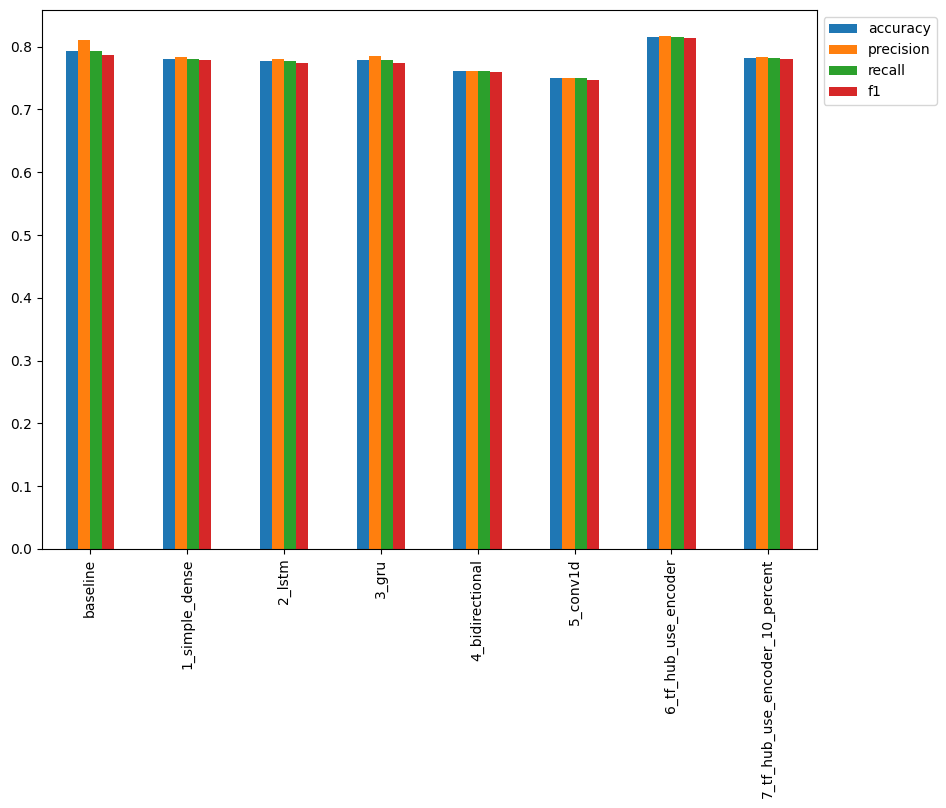

In [120]:
#Plot and compare all of the model results
all_model_results.plot(kind = "bar", figsize = (10, 7)).legend(bbox_to_anchor = (1.0,1.0))

<Axes: >

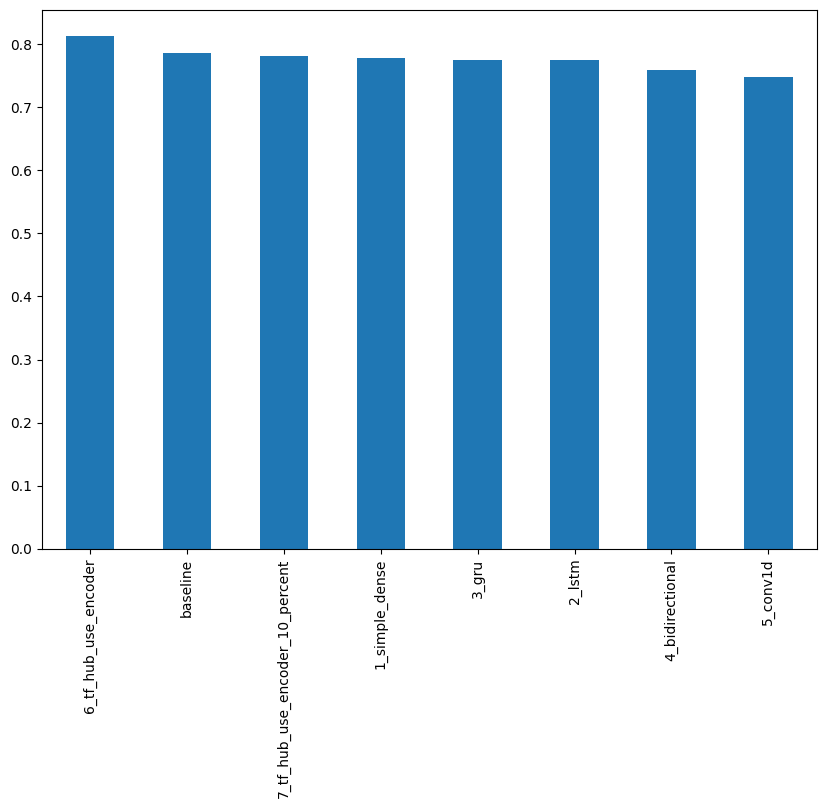

In [126]:
#sort model results by f1-score
all_model_results.sort_values("f1", ascending = False)["f1"].plot(kind="bar", figsize=(10,7))


## Uploading our model training logs to TensorBoard.dev

we can further inspect our model's performance using TensorBoard.dev

> **Note:** Tensorboard is great for quickly tracking experiments but for larger scale experiments and a whole bunch more tracking options, check out Weight and Bias:

In [128]:
#view Tensorboard logs of transfer learning modelling experiments (plus all of our other models)

#upload tensorboard.dev records
!tensorboard dev  upload --logdir /content/model_logs --name "NLP modelling experiments" --description "comparing multipke different type of model architecture on the Kaggle Tweets text classification dataset" --one_shot

2023-05-03 15:05:44.515867: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-05-03 15:05:44.515925: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke

In [129]:
#delete experments from tensorboard:

#check current experiment
!tensorboard dev list

#delete
# !tensorboard dev delete --experiment_id [experiment id]

2023-05-03 15:13:55.584807: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-05-03 15:13:55.584863: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)

***** TensorBoard Uploader *****

This will list all experiments that you've uploaded to
https://tensorboard.dev. TensorBoard.dev experiments are visible
to everyone. Do not upload sensitive data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Plea

## Saving and loading a trained model

there are 2 main formats to save a model to in tf:
1. HDF5 format
2. `SaveModel` format (this is default in tensorflow)


In [130]:
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8175707797736699,
 'recall': 0.8149606299212598,
 'f1': 0.8133343159175271}

In [131]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

In [132]:
import tensorflow_hub as hub

#Load model with custom Hub Layer (required HDF5 format)

loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects = {"KerasLayer": hub.KerasLayer})

In [133]:
#How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 28ms/step - loss: 0.4288 - accuracy: 0.8150


[0.4288027584552765, 0.8149606585502625]

now let's save to SaveModel format...

In [134]:
#save TF Hub Sentence Encoder model to SaveModel format default
model_6.save("model_6_SaveModel_format")

In [135]:
#load in a model from SaveModel format
loaded_model_6_SaveModel_format = tf.keras.models.load_model("model_6_SaveModel_format")

In [137]:
#Evaluate model in SaveModel format
loaded_model_6_SaveModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 25ms/step - loss: 0.4288 - accuracy: 0.8150


[0.4288027584552765, 0.8149606585502625]

## Finding the most wrong examples

* If our best model still isn't perfect, what examples is it getting wrong?
* And of these wrong examples which one is it getting *most* wrong (Those will prediction probabilities closest to the opposite class)


For example if a sample should have a label of 0 but our model predicts a prediction probability of 0.999 close to 1 and vice versa.

In [139]:
#download a pretrained model from google storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

--2023-05-03 15:59:50--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 108.177.119.128, 142.251.18.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  36.2MB/s    in 26s     

2023-05-03 16:00:16 (35.9 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [140]:
!unzip 08_model_6_USE_feature_extractor.zip

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.index  
  inflating: 08_model_6_USE_feature_extractor/saved_model.pb  


In [141]:
#import previously trained model from google storage
model_6_pretrained = tf.keras.models.load_model("/content/08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 24ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [143]:
#make predictions with loaded model from GS
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences) 
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [146]:
# Create DataFrame with validation sentences, validation labels and best performing model prediction labels + probabilities
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})

val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [147]:
#Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending = False)

In [149]:
most_wrong[:10] #these are false possitive

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835455
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [150]:
most_wrong.tail() #these are false negative

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043919
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


Let's remind ourselves of the target labels...
* 0 = not disaster
* 1 = disaster

In [153]:
#check the false negatives (model predicted 1 when should've been 0)

for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text: \n{text}\n")
  print("_______\n")

Target: 1, Pred: 0.0, Prob: 0.06730341911315918
Text: 
@DavidVonderhaar At least you were sincere ??

_______

Target: 1, Pred: 0.0, Prob: 0.05507582426071167
Text: 
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

_______

Target: 1, Pred: 0.0, Prob: 0.054603397846221924
Text: 
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

_______

Target: 1, Pred: 0.0, Prob: 0.05459702014923096
Text: 
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

_______

Target: 1, Pred: 0.0, Prob: 0.04963725805282593
Text: 
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

_______

Target: 1, Pred: 0.0, Prob: 0.04391852021217346
Text: 
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

_______

Target:

## making predictions on the test dataset

In [156]:
#making predictions on the test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))#our model expect a list as input
  pred = tf.round(pred_prob)
  print(f"pred: {int(pred)}, prob: {pred_prob}")
  print(f"text: \n {test_sample}\n")
  print("________________\n")

pred: 0, prob: 0.16361933946609497
text: 
 AMAZING ANCIENT TEXT RENDERINGS!
-------
Carl Gallups Dr. Michael Brown and Mark Biltz weigh in on this... http://t.co/sifF4ITJZ0

________________

pred: 0, prob: 0.09313586354255676
text: 
 @BishoyRagheb fair. Bioterrorism is the way to go. Does that mean my BSc isn't irrelevant?

________________

pred: 0, prob: 0.2123207449913025
text: 
 @theCHIVE For the record I held this shirt hostage for nearly a year before sending it last minute to TX #BidTime 

http://t.co/edbxYatmaq

________________

pred: 0, prob: 0.07533282041549683
text: 
 Free Kindle Book - Aug 3-7 - Thriller - Desolation Run by @jamessnyder22 http://t.co/PfYH4Tzvk9

________________

pred: 1, prob: 0.9027814269065857
text: 
 Port Coquitlam fire burning several businesses http://t.co/Q5FzYLBvTk

________________

pred: 1, prob: 0.9206011891365051
text: 
 Despite past devastation fortunately #forgiveness mutual #respect and #peace emerged.  #Remember #Hiroshima and #Nagasaki

_

## The speed/core tradeoff

In [157]:
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8175707797736699,
 'recall': 0.8149606299212598,
 'f1': 0.8133343159175271}

In [158]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [160]:
#let's make a function to measure the time of prediction
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.

  """

  start_time = time.perf_counter() #get start time
  model.predict(samples) #prediction
  end_time = time.perf_counter() #get end time
  total_time = end_time-start_time # calculate how long prediction tooko to make
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [161]:
#calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6_pretrained,
                                                            val_sentences)

In [162]:
model_6_total_pred_time, model_6_time_per_pred

(0.7029192019999755, 0.0009224661443569232)

In [164]:
#calculate our baseline model time per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)

baseline_total_pred_time, baseline_time_per_pred

(0.11268232600014016, 0.00014787706824165376)

In [165]:
model_6_pretrained_results = calculate_results(val_labels, model_6_pretrained_preds)

model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

Text(0, 0.5, 'f1-score')

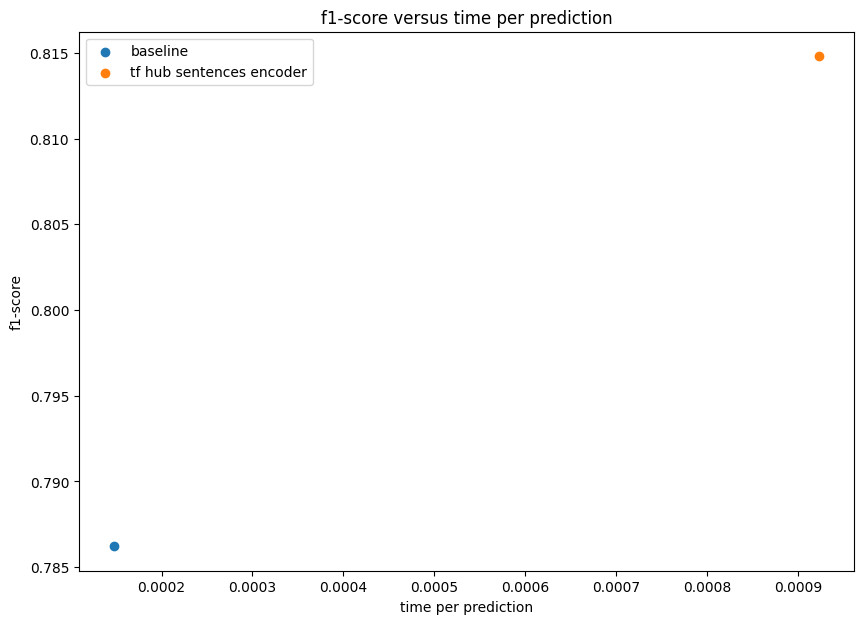

In [166]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label = "baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label = "tf hub sentences encoder")
plt.legend()
plt.title("f1-score versus time per prediction")
plt.xlabel("time per prediction")
plt.ylabel("f1-score")